# Analyze Annotations

In [2]:
from PIL import Image, ImageDraw, ImageFont
import os

def generate_character_image(character, font_size=48, image_size=(100, 100), output_dir='output_images'):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Create a blank image with white background
    image = Image.new('RGB', image_size, 'white')
    draw = ImageDraw.Draw(image)
    
    # Load the default font
    font = ImageFont.load_default()
    
    # Calculate text size and position
    # text_width, text_height = draw.textsize(character, font=font)
    # text_x = (image.width - text_width) / 2
    # text_y = (image.height - text_height) / 2
    
    # Draw the character on the image
    draw.text((50, 50), character, font=font, fill='black')
    
    # Save the image
    image_path = os.path.join(output_dir, f'{character}.png')
    image.save(image_path)
    print(f'Saved {character} image at {image_path}')

# Example usage
characters = ['汉', '字', '学', '习']  # List of Chinese characters
for char in characters:
    generate_character_image(char)

Saved 汉 image at output_images/汉.png
Saved 字 image at output_images/字.png
Saved 学 image at output_images/学.png
Saved 习 image at output_images/习.png


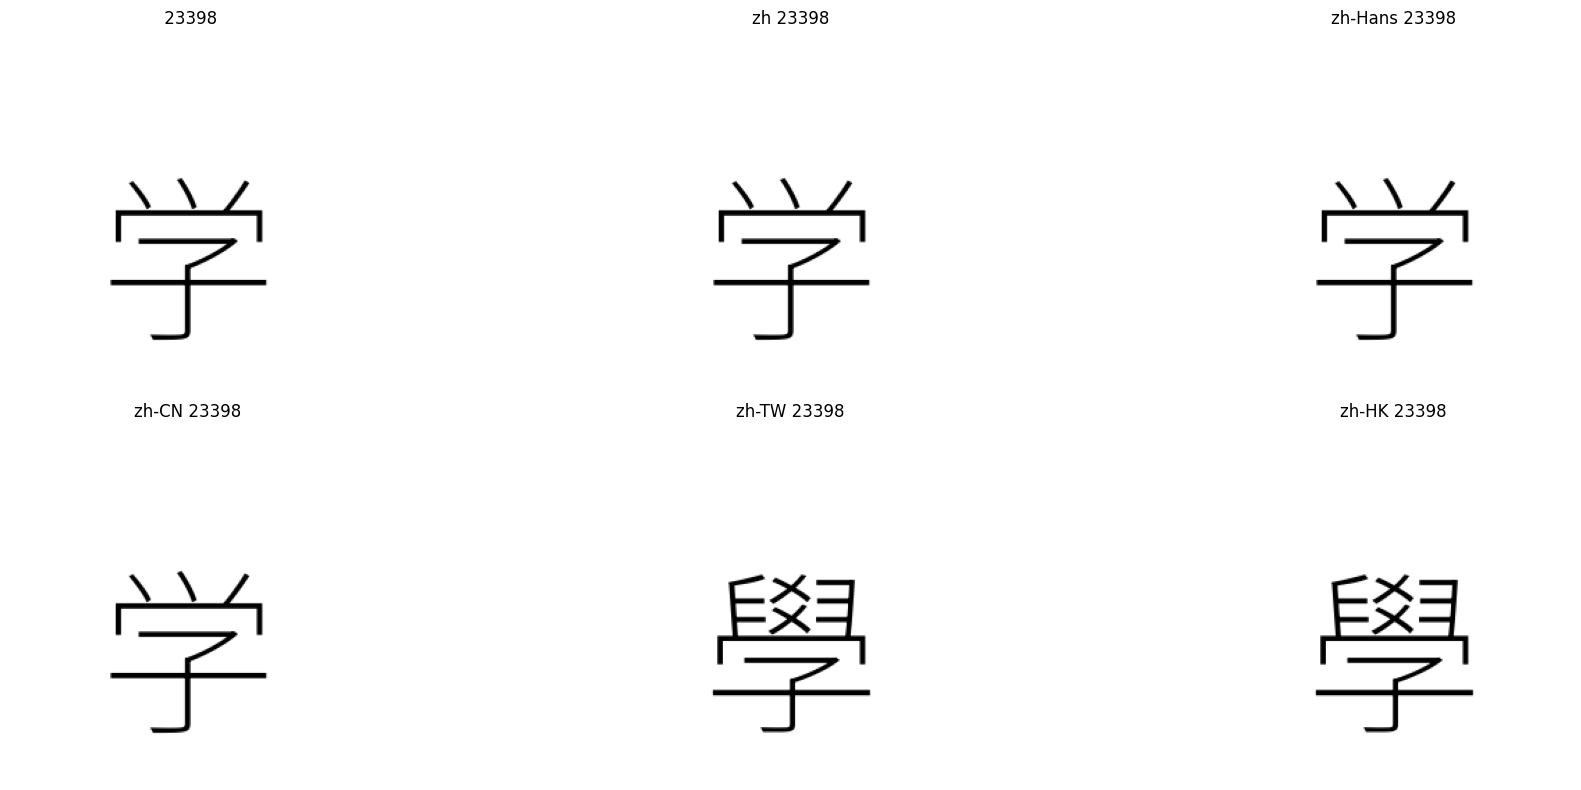

In [27]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import opencc

# Create a converter
converter = opencc.OpenCC('s2t')  # 's2t' stands for Simplified to Traditional

# Character and languages to display
char_ = "学"
traditional_char = converter.convert(char_)
languages = ["", "zh", "zh-Hans", "zh-CN", "zh-TW", "zh-HK"]

# Path to a TrueType font file that supports Chinese characters
font_path = "/home/andrew/ITRI-LungCancer/font.ttf"  # Update with the path to a font file

# Load the font
font = ImageFont.truetype(font_path, size=128)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
axes = axes.ravel()

# Generate images for each language
for i, lang in enumerate(languages):
    img = Image.new("L", (256, 256), 255)
    draw = ImageDraw.Draw(img)
    text = char_ if lang in ["", "zh", "zh-Hans", "zh-CN"] else traditional_char
    draw.text((64, 64), text, font=font, fill=0)
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(f"{lang} {ord(char_)}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()
